# TF on an iPad/iPhone!
Dirk Roorda (https://pure.knaw.nl/portal/en/persons/dirk-roorda), the inventor and developer of Text-Fabric, has released a new version of `TF` (v11.0.2) on Dec 4 2022. This new version allows now to run TF on the iPad (I am using the [`Carnets Plus` app](https://apps.apple.com/us/app/carnets-jupyter-with-scipy/id1559497253)).

In this jupyter notebook (written within the Carnets app) I will demonstrate how to run `TF` on your iPad.

## Installing `text-fabric`
As in a normal python environment on your PC/MAC you run the command: 

`%pip install --upgrade text-fabric`

Since v11.0.0 this will no longer install all of the `TF` modules but only do a basic installation. This has been done in order to not run into dependency issues when installing TF on an iPad where restrictions regarding environments and file system are being found.

If you are on a PC/Mac and and want to install all elements of `TF` you can now run the command:

`%pip install --upgrade text-fabric[all]`

In [1]:
%pip install --upgrade text-fabric

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


After `TF` is installed on the iPad you need to manually move the TF data folder within your app environment on the iPad. This can be done by going through the following steps:
1. Copy your `text-fabric-data` folder into the `Documents` folder in `Carnets`. On a Mac you can do that by simply airdropping that folder to your iPad. On the iPad the following message will appear:
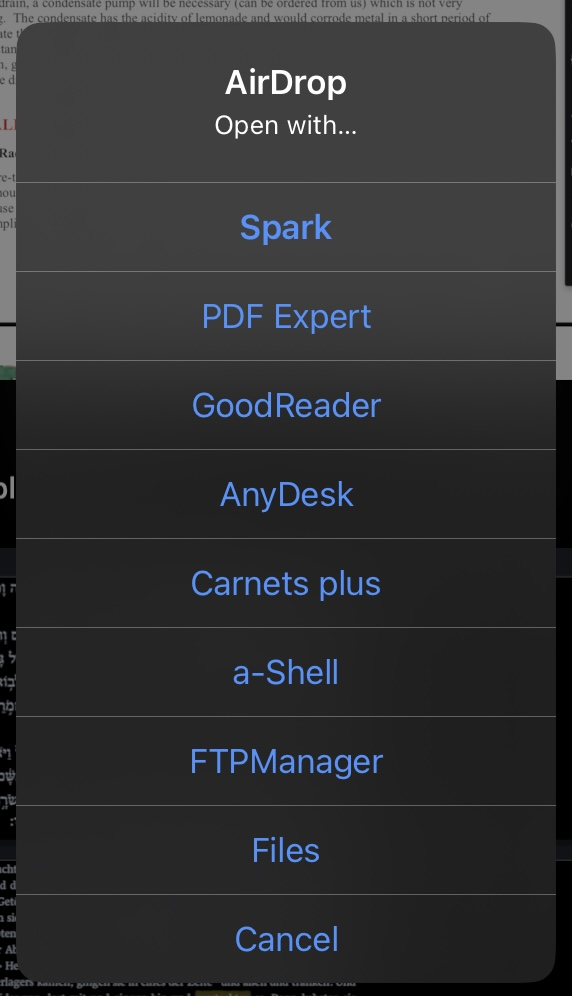

Select the `Carnets` app and you are all set.

2. Double-check whether your data is indeed in the desired folder within the `Carnets` app. You need to have the text-fabric-data as a subfolder of Documents. For example:
`/private/var/mobile/Containers/Data/Application/0998287C-3902-47AA-AF74-98C4A09GDW3A/Documents/text-fabric-data/github/...`


We are now ready and can start using TF on the iPad/iPhone as we would normally do on a PC/Mac.

## Loading TF and the BHSa data

In [2]:
# First we load the TF program
from tf.fabric import Fabric
from tf.app import use

In my enviorment I have copied the bhsa data as well as the BHSaddons from the CenterBLC. I will load both as an example in the next cell.

In [3]:
# Now we load the TF bhsa database
BHS = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')

This is Text-Fabric 11.0.2
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

131 features found and 1 ignored
  0.27s Dataset without structure sections in otext:no structure functions in the T-API
  1.79s All features loaded/computed - for details use TF.isLoaded()
  1.42s All additional features loaded - for details use TF.isLoaded()


## Running a simple Query: Looking for Abraham

In [4]:
BHSAbrahamSearch = '''
word lex=>BRHM/|>BRM/
'''
BHSAbrahamSearch  = BHS.search(BHSAbrahamSearch)
BHS.show(BHSAbrahamSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.21s 236 results


## Exporting the TF query
In iOS the file system is very restricted. Each app has its own file container. Therefore "home"/~ is never "home"/~ of your iPad folder system but of your app folder system. Be aware of this restriction when you decide to export data.

In [5]:
BHS.export(BHSAbrahamSearch, toDir='~/query_output/', toFile='BHSAbrahamSearch.tsv')

In [6]:
ls ~/Documents/query_output/

BHSAbrahamSearch.tsv


## Creating Dataframe of exported Query result
Now we can load our TSV files as pandas dataframes.

In [7]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

In [8]:
BHSAbrahamSearch=pd.read_csv('~/Documents/query_output/BHSAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSAbrahamSearch.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,11,26,5366,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,11,27,5379,word,אַבְרָ֔ם,>BRM/
2,3,Genesis,11,29,5405,word,אַבְרָ֧ם,>BRM/
3,4,Genesis,11,29,5412,word,אַבְרָם֙,>BRM/
4,5,Genesis,11,31,5437,word,אַבְרָ֣ם,>BRM/


## Some simple data mining operations

In [9]:
BHSAbrahamSearch.groupby(["lex1"]).sum()

,R,S2,S3,NODE1
lex1,,,,
>BRHM/,25742,4209,2704,10028251
>BRM/,2224,829,684,1155657


In [10]:
BHSAbrahamSearch.groupby(["lex1"]).count()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1
lex1,,,,,,,
>BRHM/,175,175,175,175,175,175,175
>BRM/,61,61,61,61,61,61,61


In [11]:
BHSAbrahamSearch[
          (BHSAbrahamSearch['lex1'] == '>BRM/')
        & (BHSAbrahamSearch['S1'] != 'Genesis')
                ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
225,226,Nehemiah,9,7,387898,word,אַבְרָ֔ם,>BRM/
227,228,1_Chronicles,1,27,391522,word,אַבְרָ֖ם,>BRM/


## Data Visualization
### Bar Plotting

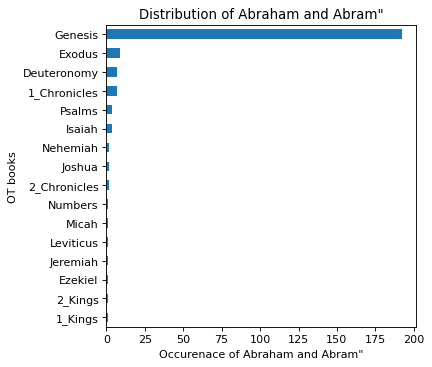

In [12]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
BHSAbrahamSearch.groupby("S1").size().sort_values(ascending=True).plot.barh()

plt.title('Distribution of Abraham and Abram"')

plt.xlabel('Occurenace of Abraham and Abram"')
plt.ylabel('OT books')

plt.show()

### Pie Plotting

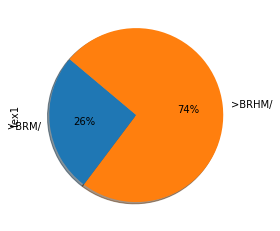

In [13]:
BHSAbrahamSearch.lex1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

### Scatter Plotting

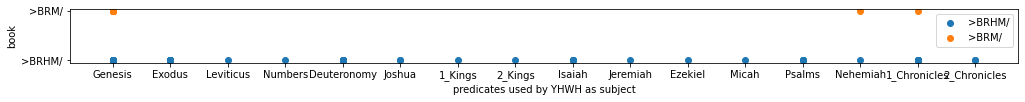

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 1)

for S1, df in BHSAbrahamSearch.groupby('lex1'):
    ax.scatter(x="S1", y="lex1", data=df, label=S1)

ax.set_xlabel("predicates used by YHWH as subject")
ax.set_ylabel("book")
ax.legend();